# Chapter 1: A tour of pandas

This chapter presents the mais features of pandas framework.

The first step in order to use pandas features is to import the **pandas** module, as well as other related modules and objects:

In [1]:
# import numpy and pandas, and DataFrame/Series
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some panda options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Series

The **Series** class is a fundamental pandas data structure. It represents a one dimension array, a sequence of values, but with flexible and powerful indexing capabilities. A pandas **Series** object is a sequence of values which may indexed by integer numbers, strings, dates, times, et.

The cell below creates a **Series** object, containing the values from 1 to 4. These values are automatically indexed by the **Series** starting from 0:

In [2]:
# creates a four item Series
s = Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

A value in a **Series** object can be accessed by its label:

In [4]:
s[2]

3

A list of labels may be used to retrieve more than one value from the **Series**:

In [3]:
s[[1,3]]

1    2
3    4
dtype: int64

The use can explicitly initialize the index of a **Series** object:

In [8]:
# create a series using an explicit index
s = Series([1,2,3,4], index=['a','b','c','d'])
s

a    1
b    2
c    3
d    4
dtype: int64

Data in the **Series** object may be accessed by a list of string, like the example below:

In [9]:
s[['a','b']]

a    1
b    2
dtype: int64

However, it is still possible to access the **Series** data trough its numerical indexes:

In [11]:
s[[2,3]]

c    3
d    4
dtype: int64

The **index** property holds an object containing only the indexes of the series:

In [13]:
# get only the index of the Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

As a **Series** object, an **Index** object offers access to its individual values through 0-based numeric indexes:

In [16]:
# get the first index
s.index[0]

'a'

In [19]:
# get the third and fourth indexes of an Index object
s.index[[2,3]]

Index(['c', 'd'], dtype='object')

In order to represent time series, we can use a **Series** object indexed by date or time values. We can create a date range using the method ```pd.date_range()```:

In [21]:
dates = pd.date_range('2018-01-01', '2018-05-23')
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17',
               '2018-05-18', '2018-05-19', '2018-05-20', '2018-05-21',
               '2018-05-22', '2018-05-23'],
              dtype='datetime64[ns]', length=143, freq='D')

We can control the frequency for which values in a date range are created trough the ```freq``` argument. The default value of the ```freq``` argument is ```'D'```, which indicates that the values in the created range are spaced by 1 day. In the example below, the values in the range created are spaced by 1 month:

In [23]:
dates = pd.date_range('2018-01-01', '2018-05-23', freq='M')
dates

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30'], dtype='datetime64[ns]', freq='M')

Then, a range created using the ```pd.date_range()``` method can be used as an index for a **Series** object:

In [25]:
# creates a Series with values (representing temperatures)
# for each date in the index
dates = pd.date_range('2018-05-01', '2018-05-06')
temps1 = Series([80, 82, 85, 90, 83, 87], index = dates)
temps1

2018-05-01    80
2018-05-02    82
2018-05-03    85
2018-05-04    90
2018-05-05    83
2018-05-06    87
Freq: D, dtype: int64

We can easily apply statistical methods provided by NumPy to a pandas **Series** object. For example, the code below returns the mean of the temperatures from 2018-05-01 to 2018-05-06:

In [29]:
temps1.mean()

84.5

Two **Series** objects which have the same indexes may be applied to each other using arithmetic operations. The result is another **Series** object such that each value is operated individually:

In [31]:
# creates a second series of values using the same index
temps2 = Series([70, 75, 69, 83, 79, 77], index = dates)
temps2

2018-05-01    70
2018-05-02    75
2018-05-03    69
2018-05-04    83
2018-05-05    79
2018-05-06    77
Freq: D, dtype: int64

In [34]:
# the following aligns the two by their index values 
# and calculates the difference at those matching labels
temp_diffs = temps1 - temps2
temp_diffs

2018-05-01    10
2018-05-02     7
2018-05-03    16
2018-05-04     7
2018-05-05     4
2018-05-06    10
Freq: D, dtype: int64

Besides subtraction, **Series** objects may be summed, multiplied and divided in a element by element mode:

In [36]:
# sum of series objecs
temps1 + temps2

2018-05-01    150
2018-05-02    157
2018-05-03    154
2018-05-04    173
2018-05-05    162
2018-05-06    164
Freq: D, dtype: int64

In [38]:
# multiplication of series objects
temps1 * temps2

2018-05-01    5600
2018-05-02    6150
2018-05-03    5865
2018-05-04    7470
2018-05-05    6557
2018-05-06    6699
Freq: D, dtype: int64

In [40]:
# division of series objects
temps1 / temps2

2018-05-01    1.142857
2018-05-02    1.093333
2018-05-03    1.231884
2018-05-04    1.084337
2018-05-05    1.050633
2018-05-06    1.129870
Freq: D, dtype: float64

What would happen if we try to operate two **Series** with different indexes ? Let's give a try!

In [46]:
# tempsApr and tempsMay are valid Series objects
tempsApr = Series([29, 30, 28, 31, 32], index = pd.date_range('2018-04-20', '2018-04-24'))
tempsMay = Series([26, 24, 22, 22, 19], index = pd.date_range('2018-05-20', '2018-05-24'))

tempsMay - tempsApr

2018-04-20   NaN
2018-04-21   NaN
2018-04-22   NaN
2018-04-23   NaN
2018-04-24   NaN
2018-05-20   NaN
2018-05-21   NaN
2018-05-22   NaN
2018-05-23   NaN
2018-05-24   NaN
dtype: float64

So, if we operate two **Series** objects with indexes of different lengths and values, the resulting index is a sorted union of the two indexes. 

## DataFrame



The **DataFrame** data structure groups multiple **Series** objects together and align them by a single index.

In [47]:
# create a DataFrame from the two series objects temp1 and temp2 
# and give them column names
temps_df = DataFrame({
    'Missoula': temps1,
    'Philadelphia': temps2
})
temps_df

            Missoula  Philadelphia
2018-05-01        80            70
2018-05-02        82            75
2018-05-03        85            69
2018-05-04        90            83
2018-05-05        83            79
2018-05-06        87            77

Columns can be acessed using an array index by its name or a list of names:

In [48]:
# get the column with the name Missoula
temps_df['Missoula']

2018-05-01    80
2018-05-02    82
2018-05-03    85
2018-05-04    90
2018-05-05    83
2018-05-06    87
Freq: D, Name: Missoula, dtype: int64

In [50]:
# likewise, we can get just the Pihladelphia column
temps_df['Philadelphia']

2018-05-01    70
2018-05-02    75
2018-05-03    69
2018-05-04    83
2018-05-05    79
2018-05-06    77
Freq: D, Name: Philadelphia, dtype: int64

Once we retrieved a column by its name, we can get a value using an index label:

In [51]:
temps_df['Missoula']['2018-05-02']

82

In [53]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2018-05-01            70        80
2018-05-02            75        82
2018-05-03            69        85
2018-05-04            83        90
2018-05-05            79        83
2018-05-06            77        87

If the column name doesn't have spaces, we can use property-style notation to retrieve a column:

In [55]:
# return the Missoula column using a property
temps_df.Missoula

2018-05-01    80
2018-05-02    82
2018-05-03    85
2018-05-04    90
2018-05-05    83
2018-05-06    87
Freq: D, Name: Missoula, dtype: int64

Arithmetic operations between columns may be performed to **DataFrame** columns just like with **Series** objects:

In [56]:
# calculate the temperature difference between the two cities
temps_df.Missoula - temps_df.Philadelphia

2018-05-01    10
2018-05-02     7
2018-05-03    16
2018-05-04     7
2018-05-05     4
2018-05-06    10
Freq: D, dtype: int64

A new column can be created simply by assigning a **Series** object to a new column name ising the array index notation:

In [60]:
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2018-05-01        80            70          10
2018-05-02        82            75           7
2018-05-03        85            69          16
2018-05-04        90            83           7
2018-05-05        83            79           4
2018-05-06        87            77          10

Also, the names of the columns can be accessed trough the ```.columns``` property:

In [61]:
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

The columns of a **DataFrame** can be sliced:

In [63]:
temps_df.Difference[1:4]

2018-05-02     7
2018-05-03    16
2018-05-04     7
Freq: D, Name: Difference, dtype: int64

An entire row can be retrieved from the **DataFrame** using the ```.loc``` and ```.iloc``` properties and indexing them:

In [64]:
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2018-05-02 00:00:00, dtype: int64

In [67]:
temps_df.loc['2018-05-05']

Missoula        83
Philadelphia    79
Difference       4
Name: 2018-05-05 00:00:00, dtype: int64

The row is converted to a **Series** object, and it is indexed by the column names:

In [71]:
# the names of the columns have become the index
# they have been 'pivoted'
temps_df.loc['2018-05-02'].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

Rows of a **DataFrame** can be selected based upon a logical expression applied to the data in each row:

In [72]:
# which values in the Missoula column are > 82 ?
temps_df.Missoula > 82

2018-05-01    False
2018-05-02    False
2018-05-03     True
2018-05-04     True
2018-05-05     True
2018-05-06     True
Freq: D, Name: Missoula, dtype: bool

In [73]:
# return the rows where the temps for Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2018-05-03        85            69          16
2018-05-04        90            83           7
2018-05-05        83            79           4
2018-05-06        87            77          10

### Loading CSV data from files

We can use pandas to load data from a CSV file to a **DataFrame**:

In [75]:
# display the contents of test1.csv

# unix-like systems
# !cat data/test1.cs
 
# on windows systems
!type data\test1.csv 

date,0,1,2
2000-01-01 00:00:00,1.10376250134,-1.90997889703,-0.808955536115
2000-01-02 00:00:00,1.18891664768,0.581119740849,0.86159734949
2000-01-03 00:00:00,-0.964200042412,0.779764393246,1.82906224532
2000-01-04 00:00:00,0.782130444001,-1.72066965573,-1.10824167327
2000-01-05 00:00:00,-1.86701699823,-0.528368292754,-2.48830894087
2000-01-06 00:00:00,2.56928022646,-0.471901478927,-0.835033249865
2000-01-07 00:00:00,-0.39932258251,-0.676426550985,-0.0112559158931
2000-01-08 00:00:00,1.64299299394,1.01341997845,1.43566709724
2000-01-09 00:00:00,1.14730764657,2.13799951538,0.554171306191
2000-01-10 00:00:00,0.933765825769,1.38715526486,-0.560142729978


In [76]:
# read the contents of the file into a DataFrame
df = pd.read_csv('data/test1.csv')
df

                  date         0         1         2
0  2000-01-01 00:00:00  1.103763 -1.909979 -0.808956
1  2000-01-02 00:00:00  1.188917  0.581120  0.861597
2  2000-01-03 00:00:00 -0.964200  0.779764  1.829062
3  2000-01-04 00:00:00  0.782130 -1.720670 -1.108242
4  2000-01-05 00:00:00 -1.867017 -0.528368 -2.488309
5  2000-01-06 00:00:00  2.569280 -0.471901 -0.835033
6  2000-01-07 00:00:00 -0.399323 -0.676427 -0.011256
7  2000-01-08 00:00:00  1.642993  1.013420  1.435667
8  2000-01-09 00:00:00  1.147308  2.138000  0.554171
9  2000-01-10 00:00:00  0.933766  1.387155 -0.560143

The first column of the file was loaded as a column of strings:

In [77]:
# the contents of the date column
df.date

0    2000-01-01 00:00:00
1    2000-01-02 00:00:00
2    2000-01-03 00:00:00
3    2000-01-04 00:00:00
4    2000-01-05 00:00:00
5    2000-01-06 00:00:00
6    2000-01-07 00:00:00
7    2000-01-08 00:00:00
8    2000-01-09 00:00:00
9    2000-01-10 00:00:00
Name: date, dtype: object

In [78]:
# we can get the first value in the date column
df.date[0]

'2000-01-01 00:00:00'

In [79]:
# it is a string
type(df.date[0])

str

However, we can instruct pandas to convert the strings in the first column to **TimeStamp** objects, which actually represents date and time:

In [80]:
# read the data and tell pandas the date column should be a date
# in the resulting DataFrame
df = pd.read_csv('data/test1.csv', parse_dates=['date'])
df

        date         0         1         2
0 2000-01-01  1.103763 -1.909979 -0.808956
1 2000-01-02  1.188917  0.581120  0.861597
2 2000-01-03 -0.964200  0.779764  1.829062
3 2000-01-04  0.782130 -1.720670 -1.108242
4 2000-01-05 -1.867017 -0.528368 -2.488309
5 2000-01-06  2.569280 -0.471901 -0.835033
6 2000-01-07 -0.399323 -0.676427 -0.011256
7 2000-01-08  1.642993  1.013420  1.435667
8 2000-01-09  1.147308  2.138000  0.554171
9 2000-01-10  0.933766  1.387155 -0.560143

In [82]:
# verify the type now is date
# in pandas, this is actually a Timestamp
type(df.date[0])

pandas._libs.tslib.Timestamp

By default, a **DataFrame** created by loading a CSV file is indexed by a zero-based integer sequence:

In [84]:
# unfortunately the index is numeric, which makes
# accessing data by date more complicated
df.index

RangeIndex(start=0, stop=10, step=1)

However, we can use the ```index_col``` argument to indicate the data column pandas should use to index the **DataFrame**:

In [86]:
# read in again, now specify the data column as being the 
# index of the resulting DataFrame
df = pd.read_csv('data/test1.csv', parse_dates=['date'], index_col='date')
df

                   0         1         2
date                                    
2000-01-01  1.103763 -1.909979 -0.808956
2000-01-02  1.188917  0.581120  0.861597
2000-01-03 -0.964200  0.779764  1.829062
2000-01-04  0.782130 -1.720670 -1.108242
2000-01-05 -1.867017 -0.528368 -2.488309
2000-01-06  2.569280 -0.471901 -0.835033
2000-01-07 -0.399323 -0.676427 -0.011256
2000-01-08  1.642993  1.013420  1.435667
2000-01-09  1.147308  2.138000  0.554171
2000-01-10  0.933766  1.387155 -0.560143

In [87]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

### Loading data from the Web

In [94]:
# imports for reading data from MorningStar
from pandas_datareader import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

# read the last three months of data for GOOG
goog = DataReader("GOOG", "morningstar", date.today() + relativedelta(months=-3))

# the result is a DataFrame
# and this gives the 5 most recent prices
goog.tail()

                     Close     High       Low     Open   Volume
Symbol Date                                                    
GOOG   2018-05-21  1079.58  1088.00  1073.650  1074.06  1023211
       2018-05-22  1069.73  1086.59  1066.690  1083.56  1090002
       2018-05-23  1079.69  1080.78  1061.710  1065.13  1060683
       2018-05-24  1079.24  1080.47  1066.150  1079.00   756152
       2018-05-25  1075.66  1082.56  1073.775  1079.02   899406

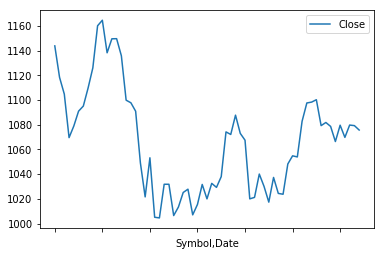

In [95]:
# plot the closing price of GOOG
goog.plot(y='Close')